### 7주차 실험 : SVR

In [25]:
from sklearn.svm import SVR
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
data = pd.read_csv("khc01221.txt")

In [26]:
def timecut(data):
    temps = pd.DataFrame()
    x=[0.1,11/30,0.9,0.1,0.9,0.9,0.1,19/30,19/30,11/30,19/30,11/30,11/30,0.9,0.1,19/30]
    y = [0.1,19/30,0.9,11/30,19/30,0.1,0.9,0.9,0.1,0.9,19/30,0.1,11/30,11/30,19/30,11/30]
    for i in range(0, 16):
        temp = pd.DataFrame({"X": data.ALX.loc[(data.ATT >= 2 + 5 * i) & (data.ATT < 7  + 5 * i)],
                            "Y": data.ALY.loc[(data.ATT >= 2 + 5 * i) & (data.ATT < 7  + 5 * i)]})
        temp = pd.concat([temp.reset_index(), pd.DataFrame( {"x":[x[i]]*temp.shape[0]} ), pd.DataFrame({"y":[y[i]]*temp.shape[0]}) ], axis = 1)
        temps = pd.concat([temps, temp])
    return temps

def timemean(data):
    temps = pd.DataFrame()
    x=[0.1,11/30,0.9,0.1,0.9,0.9,0.1,19/30,19/30,11/30,19/30,11/30,11/30,0.9,0.1,19/30]
    y = [0.1,19/30,0.9,11/30,19/30,0.1,0.9,0.9,0.1,0.9,19/30,0.1,11/30,11/30,19/30,11/30]
    for i in range(0, 16):
        temp = pd.DataFrame(pd.DataFrame({"X": data.ALX.loc[(data.ATT >= 2 + 5 * i) & (data.ATT < 7  + 5 * i)],
                            "Y": data.ALY.loc[(data.ATT >= 2 + 5 * i) & (data.ATT < 7  + 5 * i)]}).apply(np.mean)).transpose()
        temp = pd.concat([temp, pd.DataFrame( {"x":[x[i]]*temp.shape[0]} ), pd.DataFrame({"y":[y[i]]*temp.shape[0]}) ], axis = 1)
        temps = pd.concat([temps, temp])
    return temps

def times(data):
    temps = pd.DataFrame()
    x=[0.1,11/30,0.9,0.1,0.9,0.9,0.1,19/30,19/30,11/30,19/30,11/30,11/30,0.9,0.1,19/30]
    y = [0.1,19/30,0.9,11/30,19/30,0.1,0.9,0.9,0.1,0.9,19/30,0.1,11/30,11/30,19/30,11/30]
    for i in range(0, 16):
        temp = pd.DataFrame(pd.DataFrame({"X": data.ALX.loc[(data.ATT >= 2 + 5 * i) & (data.ATT < 7  + 5 * i)],
                            "Y": data.ALY.loc[(data.ATT >= 2 + 5 * i) & (data.ATT < 7  + 5 * i)]}).apply(np.mean)).transpose()
        temp = pd.concat([temp, pd.DataFrame(pd.DataFrame({"X": data.ALX.loc[(data.ATT >= 2 + 5 * i) & (data.ATT < 7  + 5 * i)],
                            "Y": data.ALY.loc[(data.ATT >= 2 + 5 * i) & (data.ATT < 7  + 5 * i)]}).apply(np.median)).transpose()])
        temp = pd.concat([temp.reset_index(), pd.DataFrame( {"x":[x[i]]*temp.shape[0]} ),  pd.DataFrame({"y":[y[i]]*temp.shape[0]}) ], axis = 1)
        temps = pd.concat([temps, temp])
    return temps

In [27]:
a = timecut(data)

In [28]:
a.head()

,index,X,Y,x,y
0,119,0.0607,0.0424,0.1,0.1
1,120,-0.0660,-0.0398,0.1,0.1
2,121,-0.0632,-0.0579,0.1,0.1
3,122,-0.0662,-0.0378,0.1,0.1
4,123,-0.0716,-0.0580,0.1,0.1


### 구조

input - x,y 좌표  
C라는 Regularize를 주고 시작함  

In [29]:
model_x = SVR(gamma = 'scale', C = 1.0)
model_y = SVR(gamma = 'scale', C = 1.0)

In [30]:
model_x.fit(a.iloc[:, 1:3].values, a.iloc[:,3:4].values.ravel())
model_y.fit(a.iloc[:, 1:3].values, a.iloc[:,4:5].values.ravel())

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [31]:
newx = model_x.predict(a.iloc[:,1:3].values)
newy = model_y.predict(a.iloc[:,1:3].values)

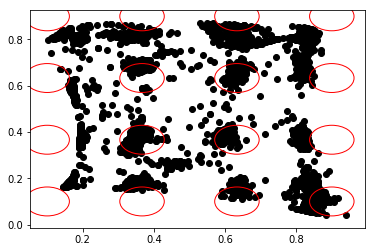

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
ax = plt.gca()
ax.scatter(newx, newy, color = "black")
x=[0.1,11/30,0.9,0.1,0.9,0.9,0.1,19/30,19/30,11/30,19/30,11/30,11/30,0.9,0.1,19/30]
y=[0.1,19/30,0.9,11/30,19/30,0.1,0.9,0.9,0.1,0.9,19/30,0.1,11/30,11/30,19/30,11/30]
for i in range(len(x)):
    temp = plt.Circle((x[i], y[i]), 1/16, color = "r", fill = False)
    ax.add_artist(temp)



### Grid Search 실험

In [12]:
parameters = {'kernel': ('linear', 'rbf','poly'), 'C':[0.1,10],'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}
model_x = SVR()
clf = GridSearchCV(model_x, parameters)
clf.fit(a.iloc[:, 1:3].values, a.iloc[:,3:4].values.ravel())
clf.best_params_

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'C': 0.1, 'epsilon': 0.1, 'gamma': 1e-07, 'kernel': 'linear'}

In [18]:
clf.best_estimator_.fit(a.iloc[:, 1:3].values, a.iloc[:,3:4].values.ravel())

SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1e-07,
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [19]:
newx = clf.best_estimator_.predict(a.iloc[:,1:3].values)

In [20]:
parameters = {'kernel': ('linear', 'rbf','poly'), 'C':[0.1,10],'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}
model_x = SVR()
clf = GridSearchCV(model_x, parameters)
clf.fit(a.iloc[:, 1:3].values, a.iloc[:,4:5].values.ravel())
clf.best_params_

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 0.1, 'epsilon': 0.2, 'gamma': 1e-07, 'kernel': 'linear'}

In [21]:
clf.best_estimator_.fit(a.iloc[:, 1:3].values, a.iloc[:,4:5].values.ravel())
newy = clf.best_estimator_.predict(a.iloc[:,1:3].values)

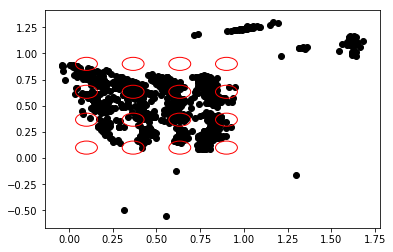

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
ax = plt.gca()
ax.scatter(newx, newy, color = "black")
x=[0.1,11/30,0.9,0.1,0.9,0.9,0.1,19/30,19/30,11/30,19/30,11/30,11/30,0.9,0.1,19/30]
y=[0.1,19/30,0.9,11/30,19/30,0.1,0.9,0.9,0.1,0.9,19/30,0.1,11/30,11/30,19/30,11/30]
for i in range(len(x)):
    temp = plt.Circle((x[i], y[i]), 1/16, color = "r", fill = False)
    ax.add_artist(temp)



![pic1](pic1.jpg)